In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.4 MB/s eta 0:00:00


In [7]:
import datasets
datasets.list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [8]:
squad_dataset = datasets.load_dataset('HHousen/quora')
print(squad_dataset['train'][0])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/HHousen___csv/HHousen--quora-1483d006d12e3ce2/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

{'label': 1, 'sentence1': 'What is your review of Hidden Figures -LRB- 2016 movie -RRB- ?', 'sentence2': 'What are your impressions of Hidden Figures -LRB- 2017 movie -RRB- ?', 'instance_id': 11877}


In [10]:
import pandas as pd
data = pd.read_csv('./sample_data/california_housing_test.csv')

In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [14]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

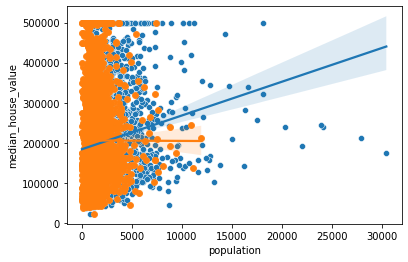

In [30]:
import seaborn as sns
ax = sns.scatterplot(x="total_rooms", y="median_house_value", data=data);
sns.regplot(x="total_rooms", y="median_house_value", data=data, scatter=False, ax=ax);
sns.scatterplot(x="population", y="median_house_value", data=data);
sns.regplot(x="population", y="median_house_value", data=data);


<AxesSubplot:>

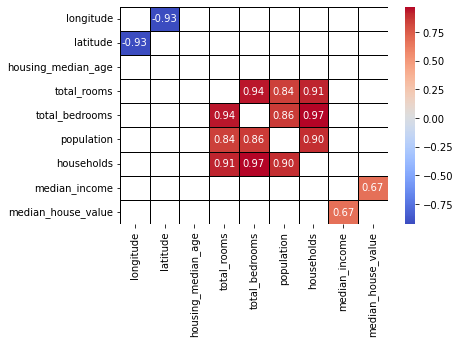

In [84]:
import numpy as np
corr_matrix = data.corr()

mask = np.zeros_like(corr_matrix)
mask[np.abs(corr_matrix) == 1.0] = True
mask[np.abs(corr_matrix) != 1.0] = False

mask[np.abs(corr_matrix) < 0.5] = True
# mask[np.abs(corr_matrix) != 1.0] = False
# mask[np.triu_indices_from(mask)] = False
# mask[np.abs(corr_matrix) > 0.5] = False

sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask, annot=True, fmt='.2f', linecolor='black', linewidths=1)